In [1]:
#Import the Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics.pairwise import cosine_similarity
import re
from PIL import Image
import requests
import random
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [2]:
20#Importing of the dataset 
users=pd.read_csv("Users.csv")
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


# **CHECKING FOR MISSING VALUES WITH VISUALISATION**

In [3]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [5]:
#checking for Null values 
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [6]:
#Hence it is clear from above that there is presence of Null values in 'Age' column

<AxesSubplot:>

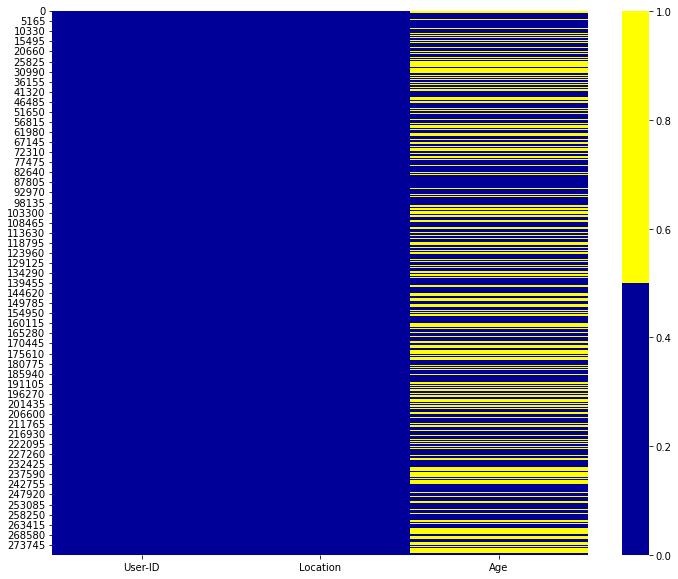

In [7]:
#Plotting of Null values 
fig=plt.figure(figsize=(12,10))
cols=users.columns
colours = ['#000099','#ffff00'] #specify the colours Yellow = missing value , Blue = not missing
sns.heatmap(users[cols].isnull(),
            cmap=sns.color_palette(colours))                            

<AxesSubplot:>

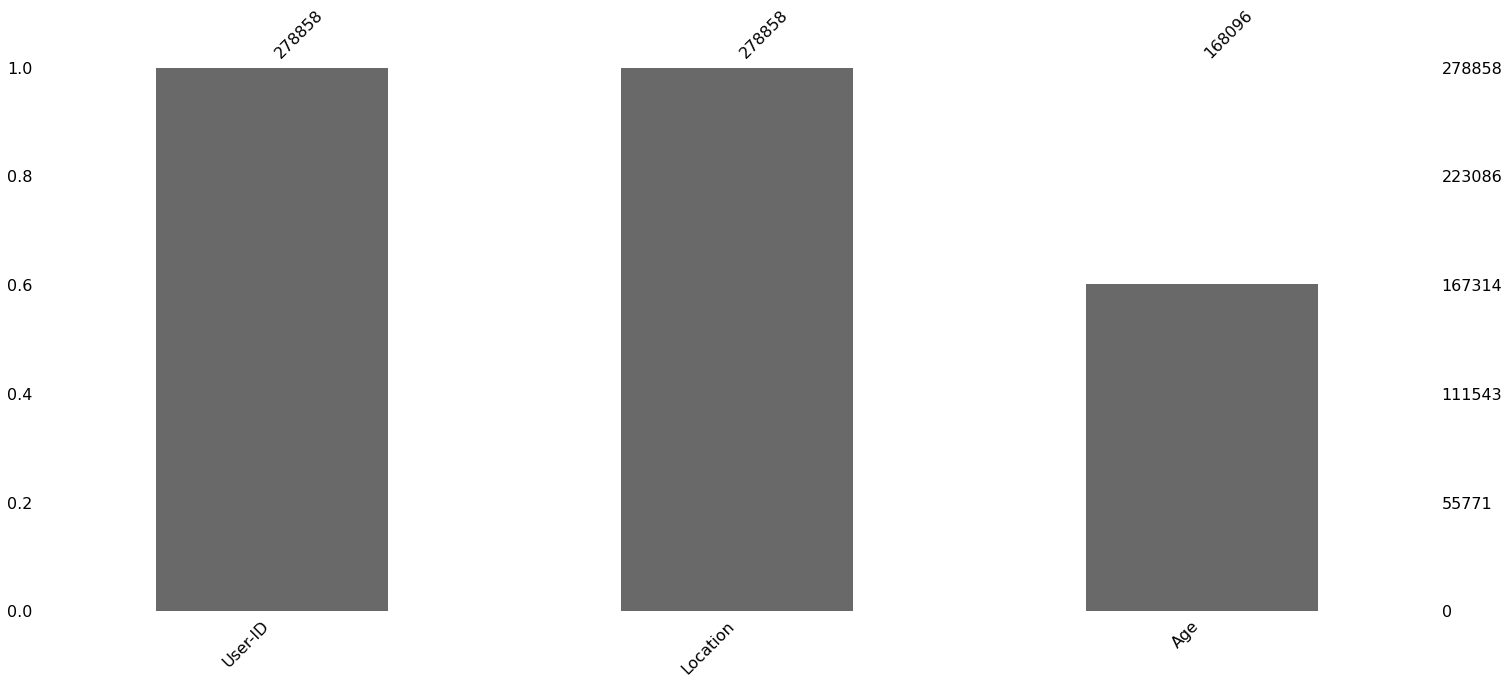

In [8]:
#Plotting bar plot for missing values 
import missingno as msno
fig=plt.figure(figsize=(4,6))
msno.bar(users)

In [9]:
#Hence from above two plots we can clearly see missing values in 'Age" column around 40 %

# **OUTLIER DETECTION**

<AxesSubplot:xlabel='Age', ylabel='Count'>

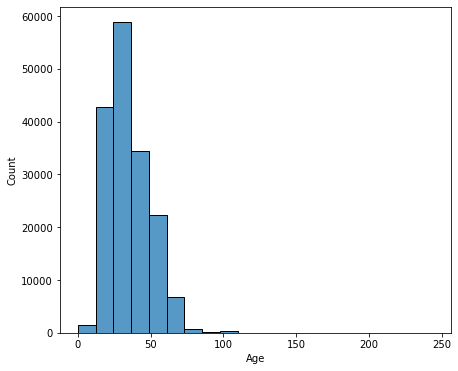

In [10]:
#Histogram of Age 
fig=plt.figure(figsize=(7,6))
sns.histplot(users['Age'],bins=20)

<AxesSubplot:xlabel='Age'>

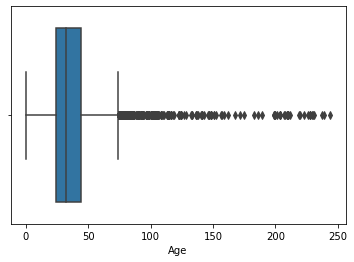

In [11]:
sns.boxplot(users['Age'])

In [12]:
users_copy=users.copy()

In [13]:
#Boxplot
def plot_box(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

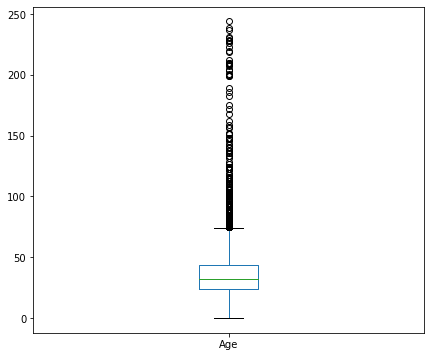

In [14]:
fig=plt.figure(figsize=(7,6))
plot_box(users_copy,"Age")

In [15]:
#Define a Function outliers in which we will store outliers
def outliers(df,ft):
  Q1= df[ft].quantile(0.25)
  Q3= df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  ls=df.index [ (df[ft]<lower_bound)| (df[ft]>upper_bound) ]

  return ls

In [16]:
#create an empty list to store output indices from multiple rows
index_list = []
for feature in ['Age']:
  index_list.extend(outliers(users_copy,feature))

In [17]:
index_list[:10]

[220, 689, 957, 1147, 1288, 1322, 1485, 1578, 2250, 2655]

In [18]:
#define a function remove which will provide data without outliers
def remove (df,ls):
  ls= sorted(set(ls))
  df=df.drop(ls)
  return df

In [19]:
users_data=remove(users_copy,index_list)
users_data.shape

(277774, 3)

<AxesSubplot:xlabel='Age'>

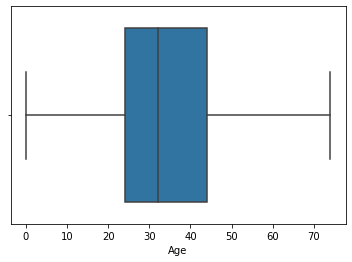

In [20]:
sns.boxplot(users_data['Age'])

Text(0.5, 1.0, 'After Outlier data processing')

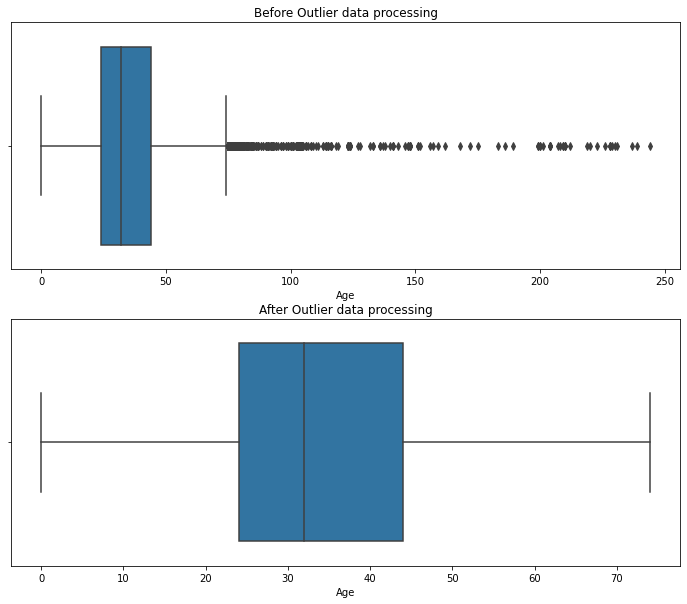

In [21]:
#Before and After outlier removal
fig, ax = plt.subplots(2,figsize=(12,10))
sns.boxplot(users['Age'],ax=ax[0])
ax[0].set_title("Before Outlier data processing")
sns.boxplot(users_data['Age'],ax=ax[1])
ax[1].set_title("After Outlier data processing")

Text(0.5, 1.0, 'After Outlier data processing')

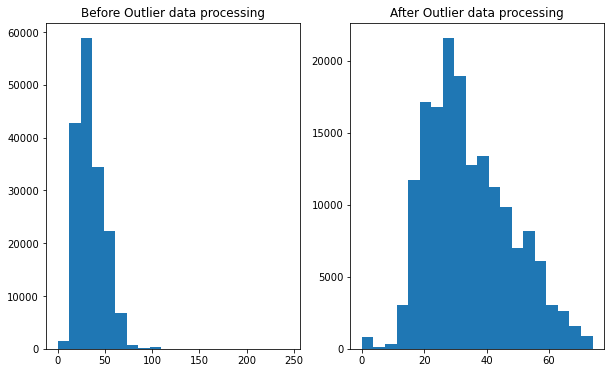

In [22]:
fig, ax = plt.subplots(1,2,figsize=(10,6)) 
ax[0].hist(users["Age"],bins=20) 
ax[0].set_title("Before Outlier data processing")

ax[1].hist(users_data["Age"],bins=20)   
ax[1].set_title("After Outlier data processing")

In [23]:
#calculate mean for cleaned data set to impute values 
users_data["Age"].describe()

count    167012.000000
mean         34.373590
std          13.517693
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          74.000000
Name: Age, dtype: float64

In [24]:
#We will impute mean rounded off to 34 in our original dataset 
users['Age'].fillna(34,inplace=True)

In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


<AxesSubplot:>

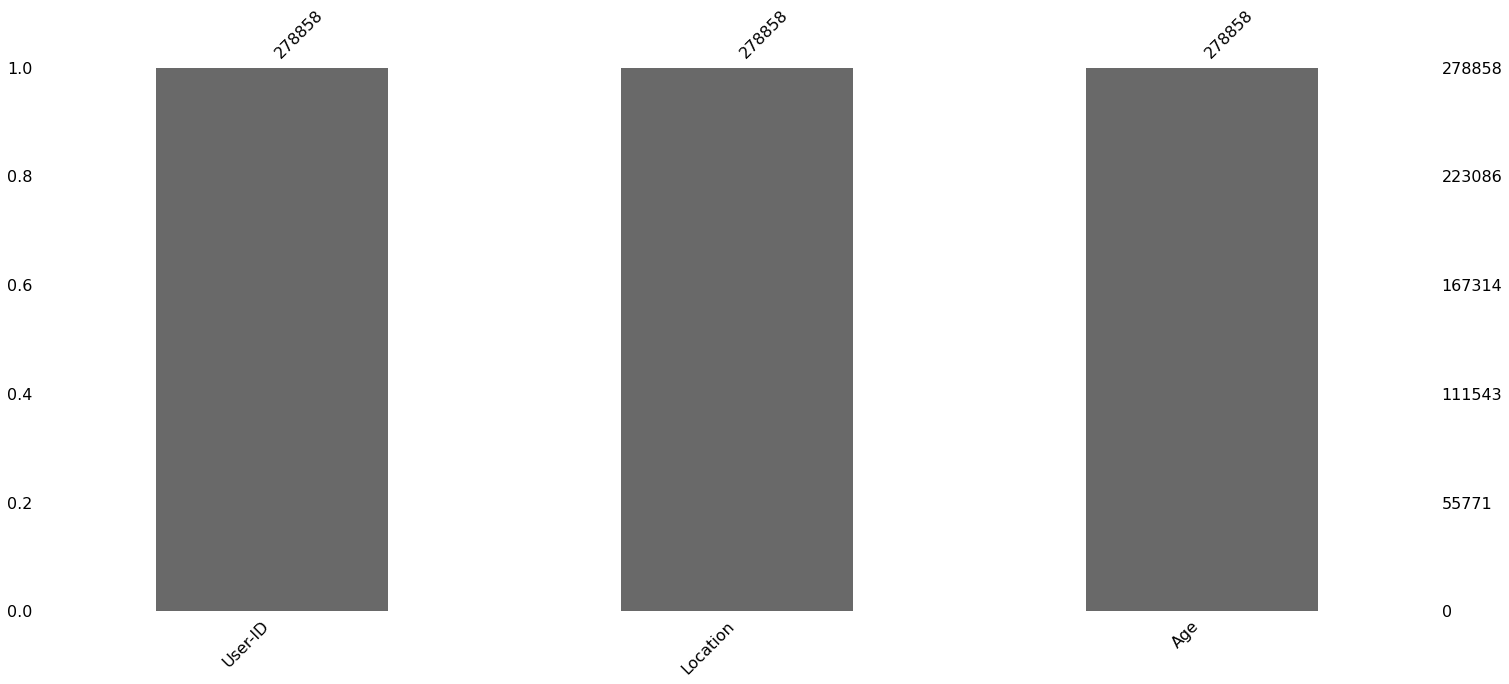

In [26]:
#Visualisation of cleaned Data
fig=plt.figure(figsize=(4,6))
msno.bar(users)

In [27]:
#Display of Age > 100 i.e outliers 
users[users.Age > 100].count()

User-ID     366
Location    366
Age         366
dtype: int64

In [28]:
#Replacing Age>100 with 100
users["Age"] = np.where(users["Age"] >100, 100,users['Age'])
users[users.Age > 100]

,User-ID,Location,Age


In [29]:
#Display of Age < 15 i.e outliers in original dataset
users[users.Age < 15].count()

User-ID     4313
Location    4313
Age         4313
dtype: int64

In [30]:
users["Age"] = np.where(users["Age"] <15, 15,users['Age'])
users[users.Age < 15]

,User-ID,Location,Age


In [31]:
users['country'] = users['Location'].str.split(',').apply(lambda x: x[-1])
users.head()

,User-ID,Location,Age,country
0,1,"nyc, new york, usa",34.0,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",34.0,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",34.0,united kingdom


In [32]:
users

,User-ID,Location,Age,country
0,1,"nyc, new york, usa",34.0,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",34.0,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",34.0,united kingdom
...,...,...,...,...
278853,278854,"portland, oregon, usa",34.0,usa
278854,278855,"tacoma, washington, united kingdom",50.0,united kingdom
278855,278856,"brampton, ontario, canada",34.0,canada
278856,278857,"knoxville, tennessee, usa",34.0,usa


In [33]:
#Dopping Location column as we have captured country column from it
users=users.drop(["Location"],axis=1)
users.head()

,User-ID,Age,country
0,1,34.0,usa
1,2,18.0,usa
2,3,34.0,russia
3,4,17.0,portugal
4,5,34.0,united kingdom


In [34]:
#Now working with books Dataset 

In [35]:
#Importing the books dataset
books=pd.read_csv("Books.csv")
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [36]:
#Checking info about data
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [37]:
#Checking for Null values 
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [38]:
#Dropping all image columns as we plan to not use it further for our model
book=books
book.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [39]:
#hence from above there is very less null values present which are acceptable
#Checking value counts of years >2021
book["Year-Of-Publication"].value_counts()

2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1924        1
2012        1
1927        1
1931        1
2037        1
Name: Year-Of-Publication, Length: 202, dtype: int64

In [40]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [41]:
pd.set_option('display.max_colwidth', -1)

In [42]:
#Display of year where the strings are present 'DK Publishing Inc'
book.loc[books['Year-Of-Publication'] =='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [43]:
#In above two records almost all columns are mismatched 
#Hence correcting the values 
book.at[209538,'Year-Of-Publication']='2000'
book.at[209538,'Book-Author']='Michael Teitelbaum'
book.at[209538,'Publisher']='DK Publishing Inc'

In [44]:
#Print the corrected record 
book.loc[[209538]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN


In [45]:
#Correction of 221678 th record 
book.at[221678,'Year-Of-Publication']='2000'
book.at[221678,'Book-Author']='James Buckley'
book.at[221678,'Publisher']='DK Publishing Inc'

In [46]:
#Print the corrected record 
book.loc[[221678]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [47]:
#exploring Another wrong year gallimard in year column
book.loc[books['Year-Of-Publication'] =='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [48]:
#Correcting the same record
book.at[220731,'Year-Of-Publication']='2003'
book.at[220731,'Book-Author']='Jean-Marie Gustave Le ClÃƒ?Ã‚Â©zio"'
book.at[220731,'Publisher']='Gallimard'
book.at[220731,'Book-Title']='Peuple du ciel, suivi de Les Bergers'

In [49]:
#Print the corrected record 
book.loc[[220731]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de Les Bergers","Jean-Marie Gustave Le ClÃƒ?Ã‚Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [50]:
book.loc[books['Year-Of-Publication'] =='2037']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
255409,068471809X,To Have and Have Not,Ernest Hemingway,2037,Simon &amp; Schuster,http://images.amazon.com/images/P/068471809X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/068471809X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/068471809X.01.LZZZZZZZ.jpg


In [51]:
## Converting year of publication in Numbers
book['Year-Of-Publication'] = book['Year-Of-Publication'].astype(int)

<AxesSubplot:>

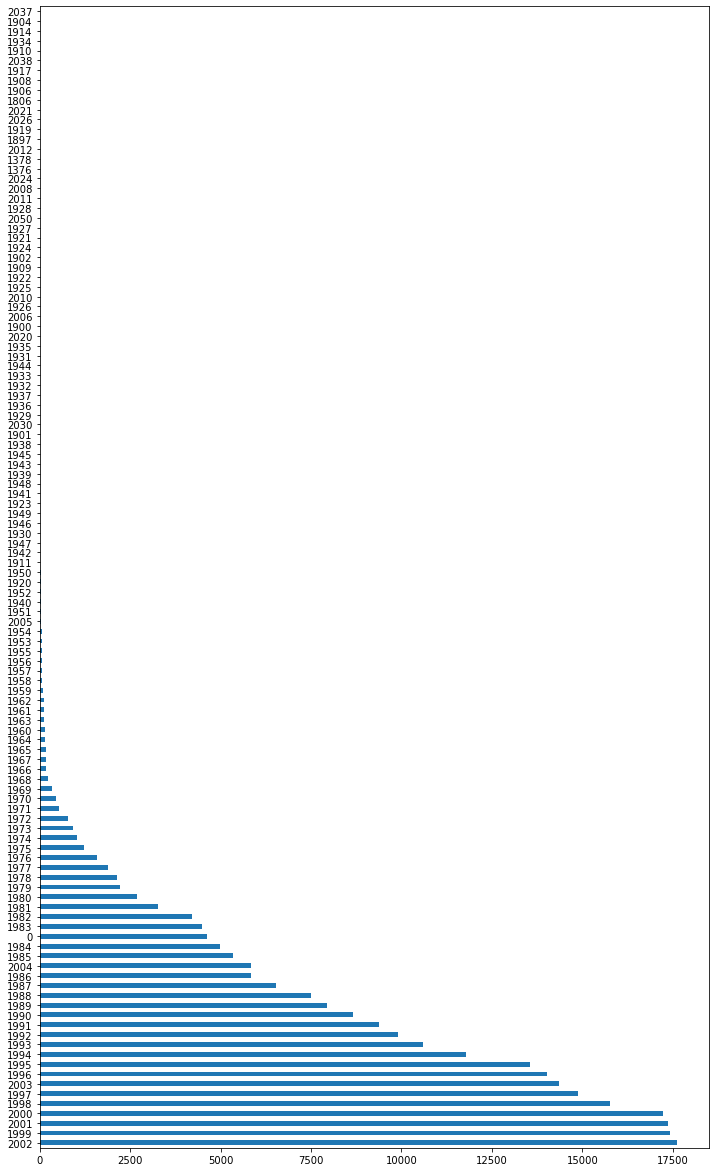

In [52]:
#plotting value counts of year of publication
fig=plt.figure(figsize=(12,21))
book["Year-Of-Publication"].value_counts().plot(kind='barh')

In [53]:
#Hence max data year with counts is 2002 
#Also 2037 year is also present so we will replace all >2022 with 2021
#And with 0 as 2002
book["Year-Of-Publication"] = np.where(book["Year-Of-Publication"] >2022,2021,book['Year-Of-Publication'])
book["Year-Of-Publication"] = np.where(book["Year-Of-Publication"] ==0,2002,book['Year-Of-Publication'])

<AxesSubplot:>

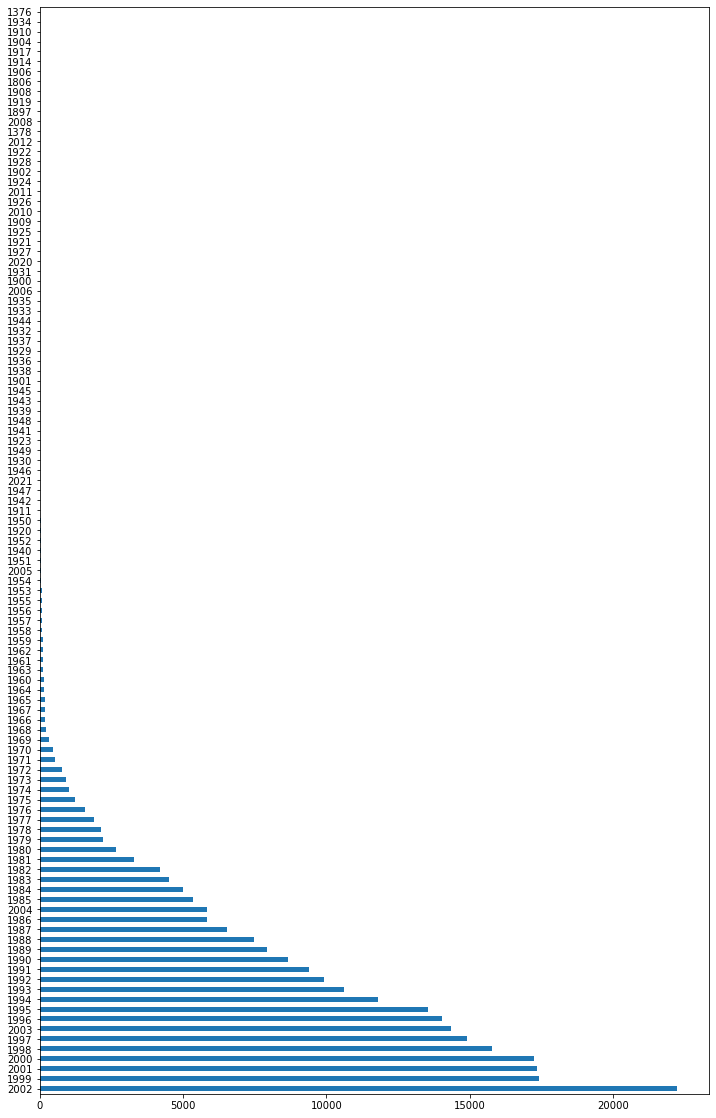

In [54]:
fig=plt.figure(figsize=(12,20))
book["Year-Of-Publication"].value_counts().plot(kind='barh')

In [55]:
#Importing ratings dataset
rating=pd.read_csv("Ratings.csv")
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [56]:
#Checking the Dataset values 
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [57]:
#Checking for Null values 
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [58]:
#Checking Book Ratings Value counts 
rating['Book-Rating'].value_counts()

0     716109
8     103736
10    78610 
7     76457 
9     67541 
5     50974 
6     36924 
4     8904  
3     5996  
2     2759  
1     1770  
Name: Book-Rating, dtype: int64

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

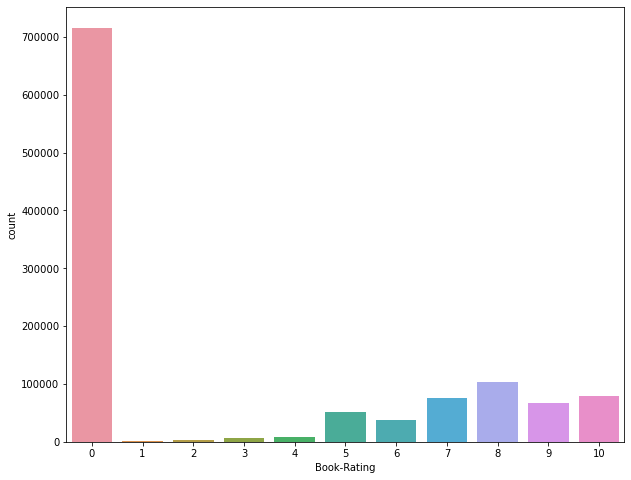

In [59]:
#Plotting Book ratings value counts for getting more idea about data
plt.figure(figsize=(10,8))
sns.countplot(x="Book-Rating", data=rating)

In [60]:
#So we found out from above that '0' ratings have more data records compartively
#As there is no need for data cleaning in ratings dataset 
#Hence merging books and ratings dataset 
data1=pd.merge(rating,book,on=['ISBN'],how='inner')

In [61]:
data1

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0517145553.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0517145553.01.LZZZZZZZ.jpg
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1575660792.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1575660792.01.LZZZZZZZ.jpg
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Trouble),Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0590907301.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0590907301.01.LZZZZZZZ.jpg
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679752714.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679752714.01.LZZZZZZZ.jpg


In [62]:
#Inspection of merged dataset data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031135 non-null  object
 5   Year-Of-Publication  1031136 non-null  int32 
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int32(1), int64(2), object(7)
memory usage: 82.6+ MB


In [63]:
#Now merging above data with users dataset
dataset=pd.merge(data1,users,on=['User-ID'],how='inner')
dataset

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,34.0,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,23.0,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0812533550.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0812533550.01.LZZZZZZZ.jpg,23.0,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679745580.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679745580.01.LZZZZZZZ.jpg,23.0,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060173289.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060173289.01.LZZZZZZZ.jpg,23.0,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2862749796.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2862749796.01.LZZZZZZZ.jpg,62.0,switzerland
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslager Kislau,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3788097000.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3788097000.01.LZZZZZZZ.jpg,34.0,"germany"""
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories: And Other Holiday Stories,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553571001.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553571001.01.LZZZZZZZ.jpg,15.0,usa
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0689822294.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0689822294.01.LZZZZZZZ.jpg,15.0,usa


<AxesSubplot:>

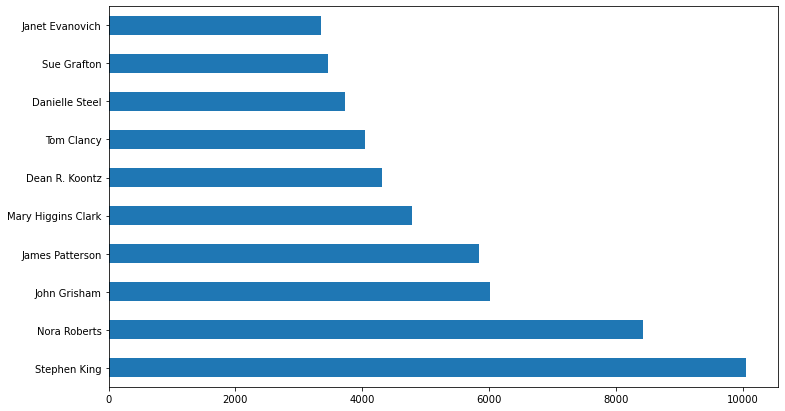

In [64]:
#Plotting top 10 authors 
plt.figure(figsize=(12,7))
dataset["Book-Author"].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

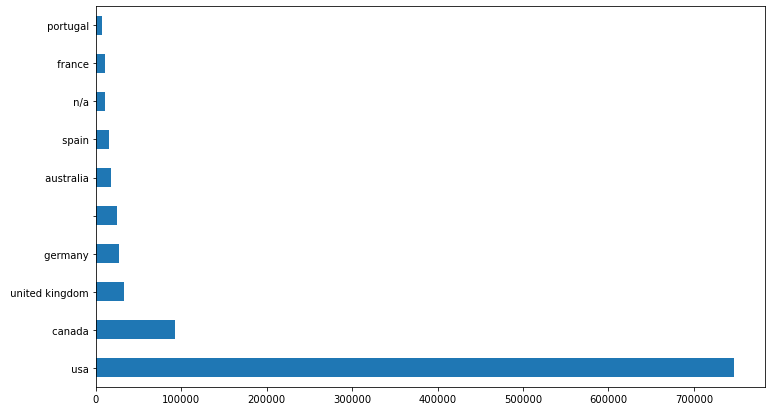

In [65]:
#plotting top 10 countries 
plt.figure(figsize=(12,7))
dataset["country"].value_counts()[:10].plot(kind='barh')

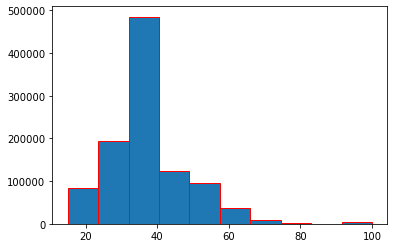

In [66]:
#plotting age group 
plt.hist(dataset["Age"],bins=10,edgecolor="red")
plt.show()

In [67]:
dataset2=dataset[dataset["Age"]<18]
dataset2

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,country
462,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,15.0,usa
463,8680,0446518581,8,Border Music,Robert James Waller,1995,Warner Books,http://images.amazon.com/images/P/0446518581.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446518581.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446518581.01.LZZZZZZZ.jpg,15.0,usa
464,8680,0060958022,6,Five Quarters of the Orange,Joanne Harris,2002,Perennial,http://images.amazon.com/images/P/0060958022.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060958022.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060958022.01.LZZZZZZZ.jpg,15.0,usa
465,8680,039914739X,0,Isle of Dogs,Patricia Daniels Cornwell,2001,Putnam Publishing Group,http://images.amazon.com/images/P/039914739X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/039914739X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/039914739X.01.LZZZZZZZ.jpg,15.0,usa
466,8680,0156005891,0,Eden Close,Anita Shreve,1998,Harvest Books,http://images.amazon.com/images/P/0156005891.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0156005891.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0156005891.01.LZZZZZZZ.jpg,15.0,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
1031036,272469,186208260X,5,Gemma James American Adventure (Magic Jewellery S.),Mike Gower,1997,Dorling Kindersley,http://images.amazon.com/images/P/186208260X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/186208260X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/186208260X.01.LZZZZZZZ.jpg,15.0,australia
1031053,273058,0681007702,5,Anne of Green Gables,L.M. Montgomery,1995,Longmeadow Press,http://images.amazon.com/images/P/0681007702.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0681007702.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0681007702.01.LZZZZZZZ.jpg,15.0,usa
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories: And Other Holiday Stories,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553571001.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553571001.01.LZZZZZZZ.jpg,15.0,usa
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0689822294.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0689822294.01.LZZZZZZZ.jpg,15.0,usa


In [68]:
dataset2.groupby('Age')['Book-Rating'].value_counts()

Age   Book-Rating
15.0  0              7946
      10             1369
      8              1309
      9              913 
      7              891 
      5              598 
      6              454 
      4              126 
      3              65  
      2              44  
      1              29  
16.0  0              1424
      8              414 
      10             412 
      7              319 
      9              297 
      6              176 
      5              157 
      4              61  
      3              26  
      2              8   
      1              5   
17.0  0              2590
      10             597 
      8              566 
      9              454 
      7              433 
      6              259 
      5              244 
      4              51  
      3              34  
      2              29  
      1              25  
Name: Book-Rating, dtype: int64

In [69]:
dft=dataset2.groupby('Age')['Book-Rating'].value_counts().reset_index(name='count')
dft

,Age,Book-Rating,count
0,15.0,0,7946
1,15.0,10,1369
2,15.0,8,1309
3,15.0,9,913
4,15.0,7,891
5,15.0,5,598
6,15.0,6,454
7,15.0,4,126
8,15.0,3,65
9,15.0,2,44


[Text(0.5, 0, 'Book-Rating')]

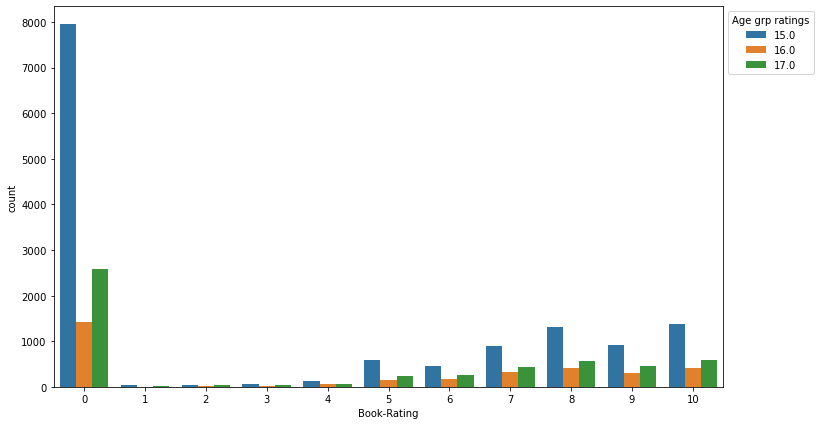

In [70]:
#Plot
plt.figure(figsize=(12,7))
p = sns.barplot(x='Book-Rating',y='count',data=dft,hue='Age')
p.legend(title='Age grp ratings',bbox_to_anchor=(1,1),loc='upper left')
p.set(xlabel='Book-Rating')

In [71]:
agedata=dataset.copy()
agedata

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,34.0,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,23.0,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0812533550.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0812533550.01.LZZZZZZZ.jpg,23.0,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679745580.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679745580.01.LZZZZZZZ.jpg,23.0,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060173289.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060173289.01.LZZZZZZZ.jpg,23.0,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2862749796.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2862749796.01.LZZZZZZZ.jpg,62.0,switzerland
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslager Kislau,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3788097000.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3788097000.01.LZZZZZZZ.jpg,34.0,"germany"""
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories: And Other Holiday Stories,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553571001.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553571001.01.LZZZZZZZ.jpg,15.0,usa
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0689822294.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0689822294.01.LZZZZZZZ.jpg,15.0,usa


In [72]:
#converting age column into groups 0 to 25 youth, 26 to 50 adults and > 50 seniors 
agedata['age_group']=pd.cut(agedata['Age'],bins=[0,25,50,101],labels=['youth','adults','seniors'],right = False)
agedata.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,country,age_group
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,34.0,usa,adults
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,23.0,usa,youth
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0812533550.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0812533550.01.LZZZZZZZ.jpg,23.0,usa,youth
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679745580.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679745580.01.LZZZZZZZ.jpg,23.0,usa,youth
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060173289.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060173289.01.LZZZZZZZ.jpg,23.0,usa,youth


In [73]:
df1=agedata.groupby('age_group')['Book-Rating'].value_counts().reset_index(name='count')
df1

,age_group,Book-Rating,count
0,youth,0,61100
1,youth,8,9277
2,youth,10,8681
3,youth,7,6946
4,youth,9,6617
5,youth,5,4337
6,youth,6,3445
7,youth,4,885
8,youth,3,569
9,youth,2,276


In [74]:
#dataset for Ratings 8 to 10
ratings=agedata[agedata["Book-Rating"]>7]

In [75]:
ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,country,age_group
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0812533550.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0812533550.01.LZZZZZZZ.jpg,23.0,usa,youth
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679745580.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679745580.01.LZZZZZZZ.jpg,23.0,usa,youth
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060173289.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060173289.01.LZZZZZZZ.jpg,23.0,usa,youth
7,2313,0345348036,9,The Princess Bride: S Morgenstern's Classic Tale of True Love and High Adventure,WILLIAM GOLDMAN,1987,Del Rey,http://images.amazon.com/images/P/0345348036.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0345348036.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0345348036.01.LZZZZZZZ.jpg,23.0,usa,youth
10,2313,0020442602,9,Voyage of the Dawn Treader,C. S. Lewis,1970,MacMillan Publishing Company.,http://images.amazon.com/images/P/0020442602.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0020442602.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0020442602.01.LZZZZZZZ.jpg,23.0,usa,youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031123,276067,0694004162,10,If You Give a Mouse a Cookie/Mini Book and Mouse Doll,Laura Joffe Numeroff,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0694004162.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0694004162.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0694004162.01.LZZZZZZZ.jpg,36.0,usa,adults
1031124,276142,0671038672,10,"Lights Out : Sleep, Sugar, and Survival",T. S. Wiley,2000,Atria,http://images.amazon.com/images/P/0671038672.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671038672.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671038672.01.LZZZZZZZ.jpg,34.0,canada,adults
1031126,276221,1550741136,8,The Science Book for Girls: And Other Intelligent Beings,Valerie Wyatt,1997,Kids Can Press,http://images.amazon.com/images/P/1550741136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1550741136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1550741136.01.LZZZZZZZ.jpg,34.0,,adults
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0689822294.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0689822294.01.LZZZZZZZ.jpg,15.0,usa,youth


[Text(0.5, 0, 'Book-Rating')]

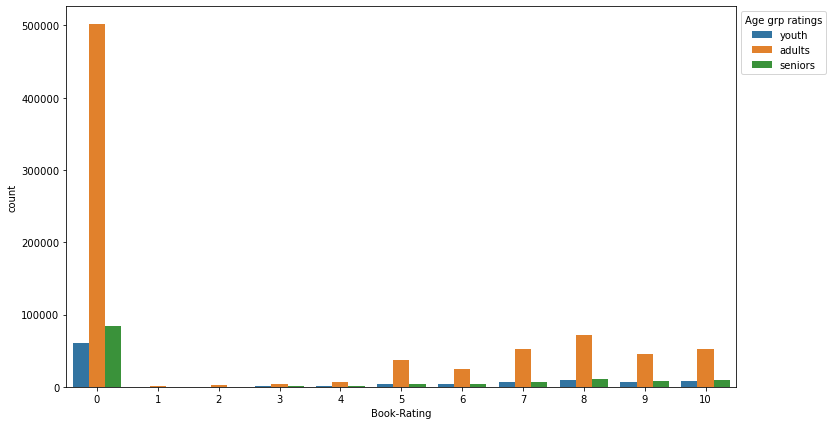

In [76]:
#Plot
plt.figure(figsize=(12,7))
p = sns.barplot(x='Book-Rating',y='count',data=df1,hue='age_group')
p.legend(title='Age grp ratings',bbox_to_anchor=(1,1),loc='upper left')
p.set(xlabel='Book-Rating')

# **EDA**

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

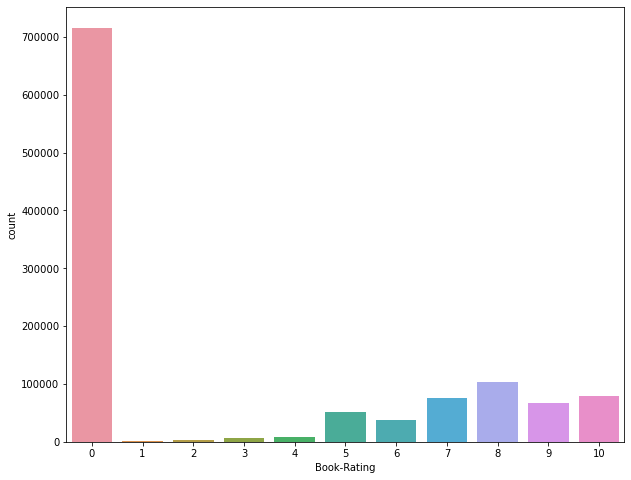

In [77]:
#Countplot of 0 to 10 ratings 
plt.figure(figsize=(10,8))
sns.countplot(x="Book-Rating", data=rating)

[Text(0.5, 0, 'Book-Rating')]

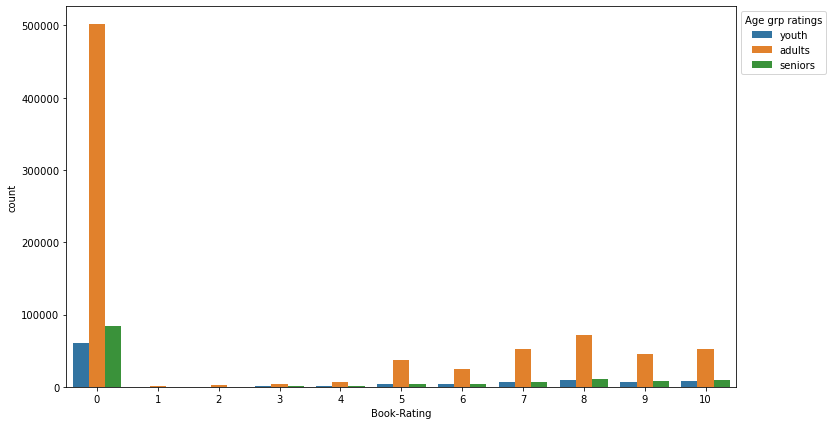

In [78]:
#Plot of age group of above count plot 
#youth= 0 to 25 , adults = 25 to 50 and seniors > 50 years of age
plt.figure(figsize=(12,7))
p = sns.barplot(x='Book-Rating',y='count',data=df1,hue='age_group')
p.legend(title='Age grp ratings',bbox_to_anchor=(1,1),loc='upper left')
p.set(xlabel='Book-Rating')

Text(0.5, 1.0, 'Top 10 countries with Most No. of readers')

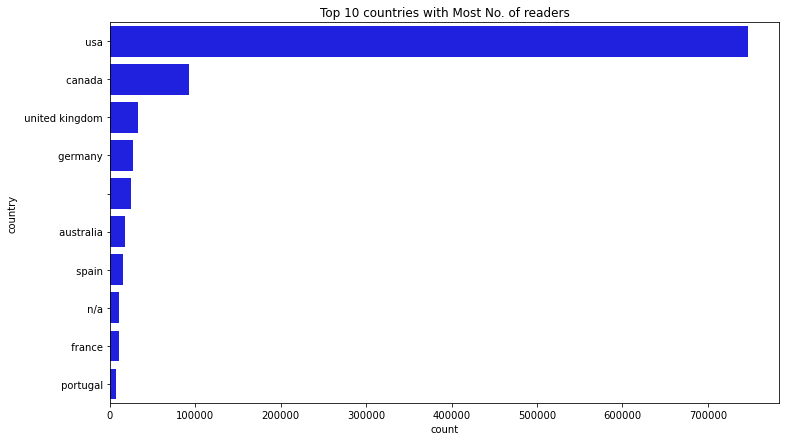

In [79]:
#plotting top 10 countries with most number of readers
plt.figure(figsize=(12,7))
sns.countplot(y="country", data=agedata, order=agedata['country'].value_counts().index[0:10],color='blue')
plt.title("Top 10 countries with Most No. of readers")

Text(0.5, 1.0, 'Top 10 countries with Most No. of readers with Age Group')

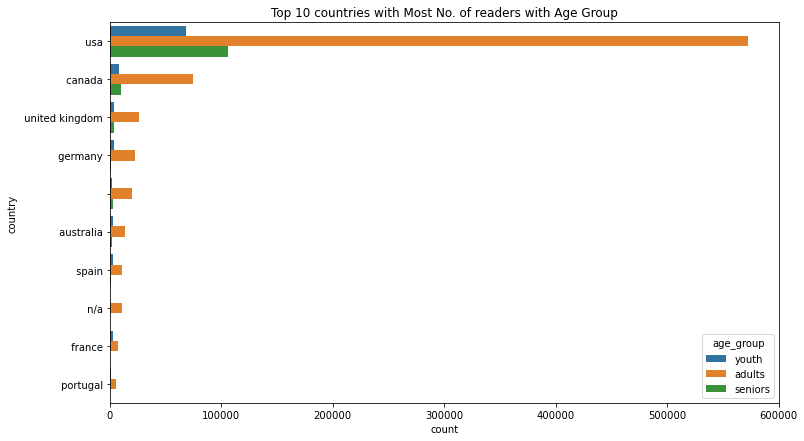

In [80]:
#Plotting the Age group in countries 
plt.figure(figsize=(12,7))
sns.countplot(y="country", data=agedata,order=agedata['country'].value_counts().index[0:10],hue='age_group')
plt.title("Top 10 countries with Most No. of readers with Age Group")

Text(0.5, 1.0, 'Top 10 Book-Author with Most No. of readers')

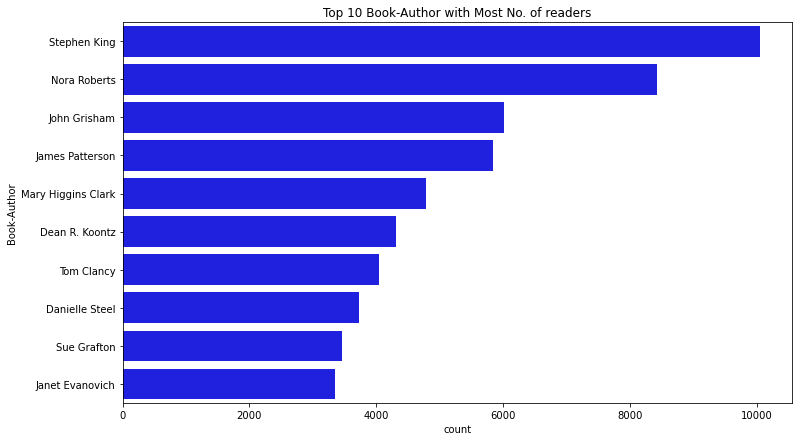

In [81]:
#plotting top 10 Book-Author with most number of readers
plt.figure(figsize=(12,7))
sns.countplot(y="Book-Author", data=agedata, order=agedata['Book-Author'].value_counts().index[0:10],color='blue')
plt.title("Top 10 Book-Author with Most No. of readers")

Text(0.5, 1.0, 'Top 10 Book-Author with Most No. of readers with Age Grp')

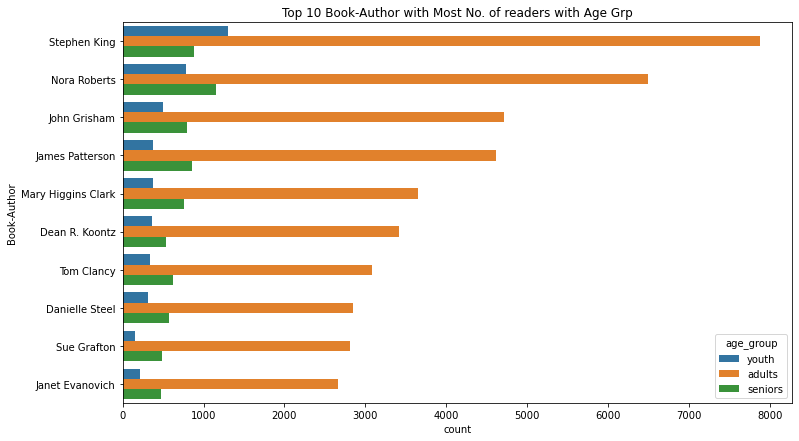

In [82]:
#plotting top 10 Book-Author with most number of readers with Age Group
plt.figure(figsize=(12,7))
sns.countplot(y="Book-Author", data=agedata, order=agedata['Book-Author'].value_counts().index[0:10],hue='age_group')
plt.title("Top 10 Book-Author with Most No. of readers with Age Grp")

Text(0.5, 1.0, 'Top 10 Year-Of-Publication with Most No. of readers')

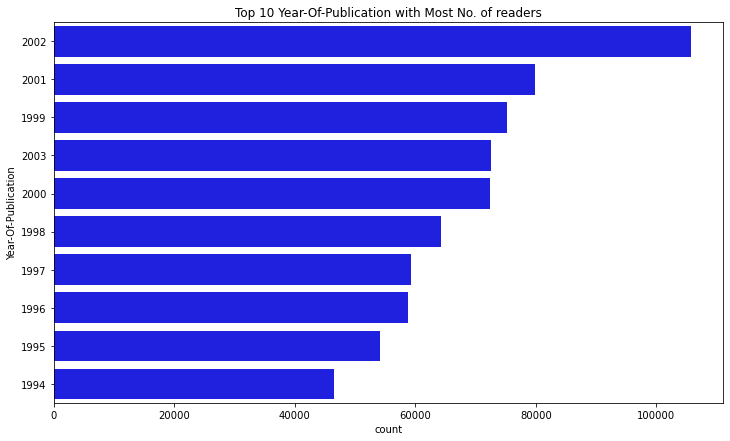

In [83]:
#plotting top 10 Year-Of-Publication with most number of readers
plt.figure(figsize=(12,7))
sns.countplot(y="Year-Of-Publication", data=agedata, order=agedata['Year-Of-Publication'].value_counts().index[0:10],color='blue')
plt.title("Top 10 Year-Of-Publication with Most No. of readers")

Text(0.5, 1.0, 'Top 10 Year-Of-Publication with Most No. of readers with Age Grp')

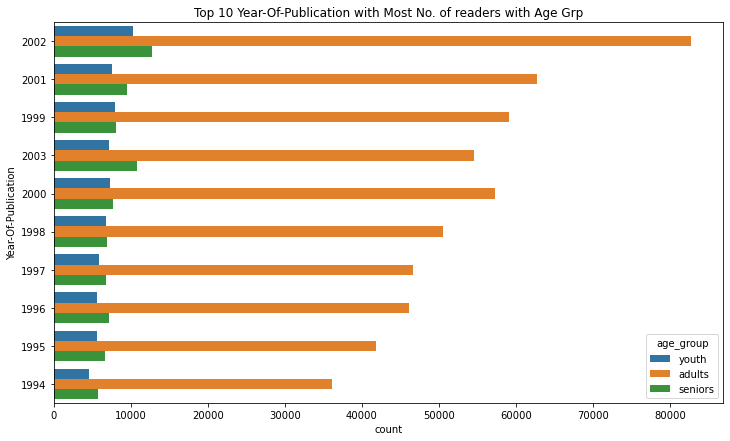

In [84]:
#plotting top 10 Year-Of-Publication with most number of readers with Age Group
plt.figure(figsize=(12,7))
sns.countplot(y="Year-Of-Publication", data=agedata, order=agedata['Year-Of-Publication'].value_counts().index[0:10],
              hue='age_group')
plt.title("Top 10 Year-Of-Publication with Most No. of readers with Age Grp")

Text(0.5, 1.0, 'Top 10 Book-Title with Ratings 8 to 10')

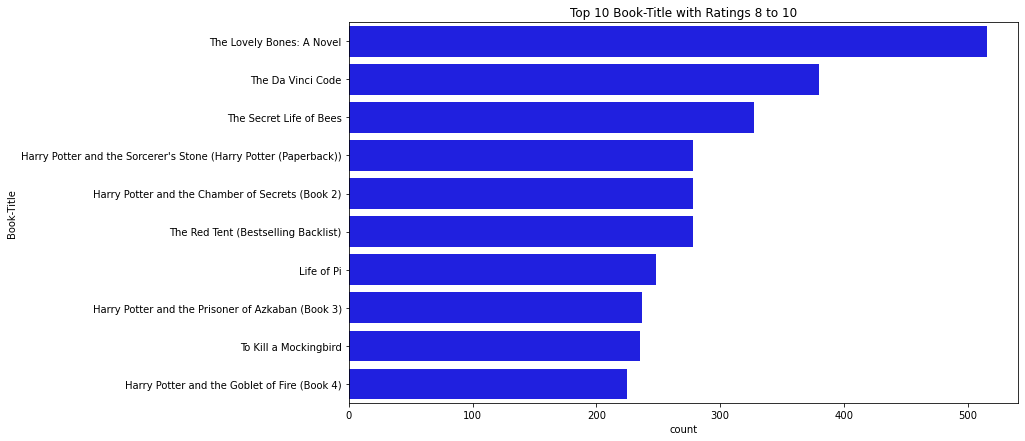

In [85]:
#Plot of Top 10 Book Titles with Ratings 8 to 10 
plt.figure(figsize=(12,7))
sns.countplot(y="Book-Title", data=ratings, order=ratings['Book-Title'].value_counts().index[0:10],color='blue')
plt.title("Top 10 Book-Title with Ratings 8 to 10")

Text(0.5, 1.0, 'Top 10 Book-Title with Ratings 8 to 10 with Age Grp')

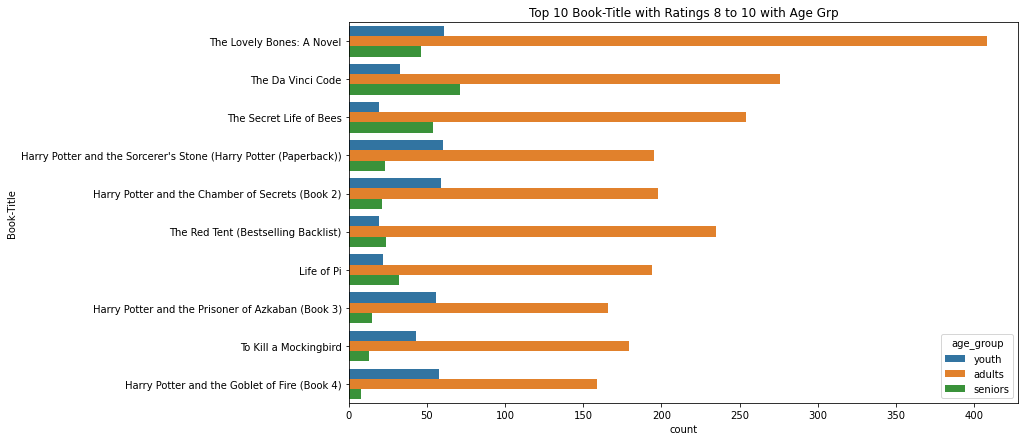

In [86]:
#Plot of Top 10 Book Titles with Ratings 8 to 10 with Age Group
plt.figure(figsize=(12,7))
sns.countplot(y="Book-Title", data=ratings, order=ratings['Book-Title'].value_counts().index[0:10],
              hue='age_group')
plt.title("Top 10 Book-Title with Ratings 8 to 10 with Age Grp")

Text(0.5, 1.0, 'Top 10 Book-Author with Ratings 8 to 10')

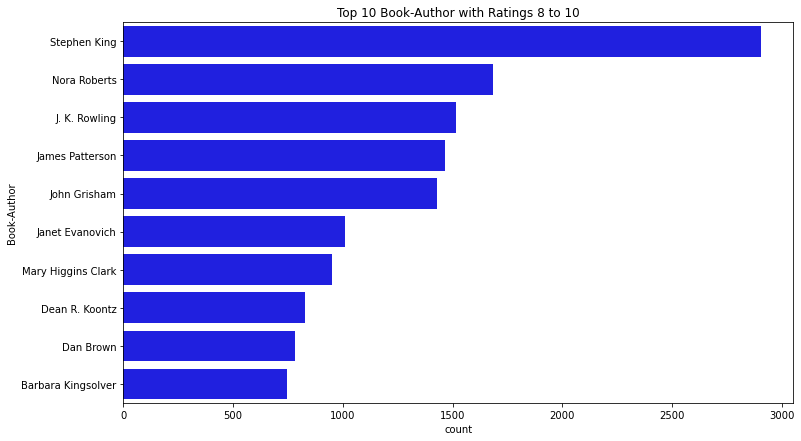

In [87]:
#Plot of Top 10 Book Titles with Ratings 8 to 10 
plt.figure(figsize=(12,7))
sns.countplot(y="Book-Author", data=ratings, order=ratings['Book-Author'].value_counts().index[0:10],color='blue')
plt.title("Top 10 Book-Author with Ratings 8 to 10")

Text(0.5, 1.0, 'Top 10 Book-Author with Ratings 8 to 10 with Age Grp')

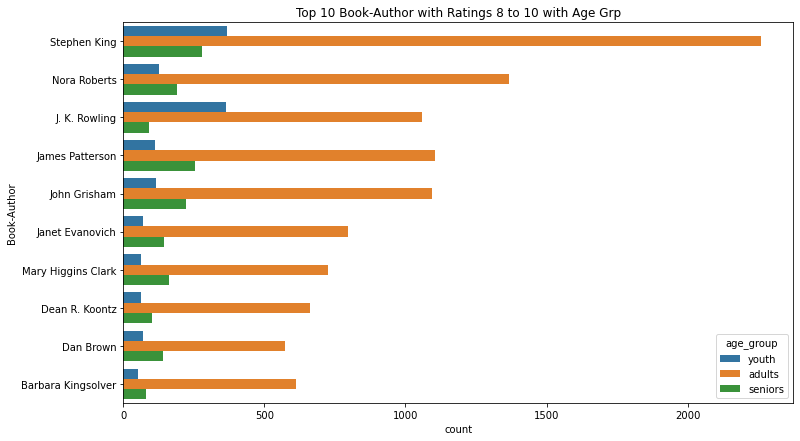

In [88]:
#Plot of Top 10 Book Titles with Ratings 8 to 10 with Age Group
plt.figure(figsize=(12,7))
sns.countplot(y="Book-Author", data=ratings, order=ratings['Book-Author'].value_counts().index[0:10],
              hue='age_group')
plt.title("Top 10 Book-Author with Ratings 8 to 10 with Age Grp")

In [89]:
rating['Book-Rating'].head()

0    0
1    5
2    0
3    3
4    6
Name: Book-Rating, dtype: int64

In [90]:
books_data=books.merge(rating,on="ISBN")
books_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,41385,0


In [91]:
import re
df=books_data.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop(columns=["ISBN","Year-Of-Publication","Image-URL-S","Image-URL-M"],axis=1,inplace=True)
df.drop(index=df[df["Book-Rating"]==0].index,inplace=True)
df["Book-Title"]=df["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
df.head()

,Book-Title,Book-Author,Publisher,Image-URL-L,User-ID,Book-Rating
1,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5
3,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11676,8
5,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,67544,8
8,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,116866,9
9,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,123629,9


In [92]:
new_df=df[df['User-ID'].map(df['User-ID'].value_counts()) > 200]  # Drop users who vote less than 200 times.
users_pivot=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_pivot.fillna(0,inplace=True)

In [93]:
from sklearn.metrics.pairwise import cosine_similarity
def user_choice(id):
    
    users_fav=new_df[new_df["User-ID"]==id].sort_values(["Book-Rating"],ascending=False)[0:5]
    return users_fav

In [94]:
def user_based(new_df,id):
    if id not in new_df["User-ID"].values:
        print("❌ User NOT FOUND ❌")
        
        
    else:
        index = np.where(users_pivot.index==id)[0][0]
        similarity=cosine_similarity(users_pivot)
        similar_users=list(enumerate(similarity[index]))
        similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[0:5]
        
        user_rec=[]
        
        for i in similar_users:
            data=df[df["User-ID"]==users_pivot.index[i[0]]]
            user_rec.extend(list(data.drop_duplicates("User-Id")["User-ID"].values))
            
    return user_rec

In [95]:
def common(new_df,user,user_id):
    x=new_df[new_df["User-ID"]==user_id]
    recommend_books=[]
    user=list(user)
    for i in user:
        y=new_df[(new_df["User-ID"]==i)]
        books=y.loc[~y["Book-Title"].isin(x["Book-Title"]),:]
        books=books.sort_values(["Book-Rating"],ascending=False)[0:5]
        recommend_books.extend(books["Book-Title"].values)
        
    return recommend_books[0:5]

In [96]:
import random
from PIL import Image
import requests
user_id=random.choice(new_df["User-ID"].values)
user_choice_df=pd.DataFrame(users_choice(user_id))
user_favorite=users_choice(user_id)
n=len(user_choice_df["Book-Title"].values)
print("🟦 USER: {} ".format(user_id))
    
fig,ax=plt.subplots(1,n,figsize=(17,5))
fig.suptitle("YOUR FAVORITE BOOKS",fontsize=40,color="salmon")
    
for i in range(n):
        url=new_df.loc[new_df["Book-Title"]==user_choice_df["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
        img=Image.open(requests.get(url,stream=True).raw)
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title("RATING: {} ".format(round(new_df[new_df["Book-Title"]==user_choice_df["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=22)
        fig.show()

user_based_rec=user_based(new_df,user_id)
books_for_user=common(new_df,user_based_rec,user_id)
books_for_userDF=pd.DataFrame(books_for_user,columns=["Book-Title"])

fig,ax=plt.subplots(1,5,figsize=(17,5))
fig.suptitle("YOU MAY ALSO LIKE THESE BOOKS",fontsize=40,color="mediumseagreen")
for i in range(5):
    url=new_df.loc[new_df["Book-Title"]==books_for_userDF["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
    img=Image.open(requests.get(url,stream=True).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title("RATING: {} ".format(round(new_df[new_df["Book-Title"]==books_for_userDF["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=22)
    fig.show()

NameError: name 'users_choice' is not defined